# Wrangling and Analyzing Data

In [67]:
import numpy as np
import pandas as pd
import requests
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

## Gather

In [68]:
df = pd.read_csv('twitter-archive-enhanced-2.csv')
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [69]:
df = pd.read_csv('Image-Predictions-3.tsv', sep='\t')
df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [70]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

tweet_ids = df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count +=1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 666020888022790149
Success
2: 666029285002620928
Success
3: 666033412701032449
Success
4: 666044226329800704
Success
5: 666049248165822465
Success
6: 666050758794694657
Success
7: 666051853826850816
Success
8: 666055525042405380
Success
9: 666057090499244032
Success
10: 666058600524156928
Success
11: 666063827256086533
Success
12: 666071193221509120
Success
13: 666073100786774016
Success
14: 666082916733198337
Success
15: 666094000022159362
Success
16: 666099513787052032
Success
17: 666102155909144576
Success
18: 666104133288665088
Success
19: 666268910803644416
Success
20: 666273097616637952
Success
21: 666287406224695296
Success
22: 666293911632134144
Success
23: 666337882303524864
Success
24: 666345417576210432
Success
25: 666353288456101888
Success
26: 666362758909284353
Success
27: 666373753744588802
Success
28: 666396247373291520
Success
29: 666407126856765440
Success
30: 666411507551481857
Success
31: 666418789513326592
Success
32: 666421158376562688
Success
33: 6664282763494

In [71]:
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [72]:
print(df_list[0])

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015', 'id': 666020888022790149, 'id_str': '666020888022790149', 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj', 'truncated': False, 'display_text_range': [0, 131], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}, 'ext

## Assess

*twitter-archive-enhanced*

In [73]:
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [74]:
df_archive = df_archive.rename(columns = {'tweet_id' : 'id'})
df_archive

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [75]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [76]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [77]:
df_archive.isnull().sum()

id                               0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [78]:
df_archive.duplicated().sum()

0

*Image Predictions*

In [79]:
df_Image = pd.read_csv('Image-Predictions-3.tsv', sep='\t')

In [80]:
df_Image = df_Image.rename(columns = {'tweet_id' : 'id'})
df_Image

,id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [81]:
df_Image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2075 non-null   int64  
 1   jpg_url  2075 non-null   object 
 2   img_num  2075 non-null   int64  
 3   p1       2075 non-null   object 
 4   p1_conf  2075 non-null   float64
 5   p1_dog   2075 non-null   bool   
 6   p2       2075 non-null   object 
 7   p2_conf  2075 non-null   float64
 8   p2_dog   2075 non-null   bool   
 9   p3       2075 non-null   object 
 10  p3_conf  2075 non-null   float64
 11  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [82]:
df_Image['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [83]:
df_Image.isnull().sum()

id         0
jpg_url    0
img_num    0
p1         0
p1_conf    0
p1_dog     0
p2         0
p2_conf    0
p2_dog     0
p3         0
p3_conf    0
p3_dog     0
dtype: int64

In [84]:
df_Image.duplicated().sum()

0

*tweeter API*

In [85]:
df_tweet = pd.DataFrame(df_list, columns = ['created_at',
                                            'id',
                                            'id_str',
                                            'hashtags',
                                            'friends_count',                              
                                            'listed_count',
                                            'withheld_in_countries',
                                            'profile_background_tile',
                                            'profile_text_tile',
                                            'place',
                                            'photo',
                                            'time_zone',
                                            'lang',
                                            'full_text',                         
                                            'truncated',
                                            'display_text_range',                
                                            'entities',                            
                                            'extended_entities',                 
                                            'source',                              
                                            'in_reply_to_status_id',            
                                            'in_reply_to_status_id_str',        
                                            'in_reply_to_user_id',            
                                            'in_reply_to_user_id_str',          
                                            'in_reply_to_screen_name',          
                                            'user',                                
                                            'geo',                              
                                            'coordinates',                      
                                            'contributors',                     
                                            'is_quote_status',                     
                                            'retweet_count',                       
                                            'favorite_count',                      
                                            'favorited',                           
                                            'retweeted',                           
                                            'possibly_sensitive',                
                                            'possibly_sensitive_appealable',     
                                            'retweeted_status',                 
                                            'quoted_status_id',
                                            'quoted_status_id_str',
                                            'quoted_status'])

In [86]:
df_tweet.head()

,created_at,id,id_str,hashtags,friends_count,listed_count,withheld_in_countries,profile_background_tile,profile_text_tile,place,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,NaN,NaN,NaN,NaN,NaN,NaN,None,...,436,2321,False,False,False,False,NaN,NaN,NaN,NaN
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,NaN,NaN,NaN,NaN,NaN,NaN,None,...,40,116,False,False,False,False,NaN,NaN,NaN,NaN
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,NaN,NaN,NaN,NaN,NaN,NaN,None,...,37,103,False,False,False,False,NaN,NaN,NaN,NaN
3,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,NaN,NaN,NaN,NaN,NaN,NaN,None,...,118,252,False,False,False,False,NaN,NaN,NaN,NaN
4,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,NaN,NaN,NaN,NaN,NaN,NaN,None,...,37,92,False,False,False,False,NaN,NaN,NaN,NaN


In [87]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2046 non-null   object 
 1   id                             2046 non-null   int64  
 2   id_str                         2046 non-null   object 
 3   hashtags                       0 non-null      float64
 4   friends_count                  0 non-null      float64
 5   listed_count                   0 non-null      float64
 6   withheld_in_countries          0 non-null      float64
 7   profile_background_tile        0 non-null      float64
 8   profile_text_tile              0 non-null      float64
 9   place                          1 non-null      object 
 10  photo                          0 non-null      float64
 11  time_zone                      0 non-null      float64
 12  lang                           2046 non-null   o

In [88]:
df_tweet['retweet_count'].value_counts().sum()

2046

In [89]:
df_tweet.isnull().sum()

created_at                          0
id                                  0
id_str                              0
hashtags                         2046
friends_count                    2046
listed_count                     2046
withheld_in_countries            2046
profile_background_tile          2046
profile_text_tile                2046
place                            2045
photo                            2046
time_zone                        2046
lang                                0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                   0
source                              0
in_reply_to_status_id            2023
in_reply_to_status_id_str        2023
in_reply_to_user_id              2023
in_reply_to_user_id_str          2023
in_reply_to_screen_name          2023
user                                0
geo                              2046
coordinates 

In [90]:
all_columns = pd.Series(list(df_archive) + list(df_Image) + list(df_tweet))
all_columns[all_columns.duplicated()]

17                       id
30                       id
47                   source
48    in_reply_to_status_id
50      in_reply_to_user_id
dtype: object

**Quality**

- **archive table** **,** **Image Predictions table** **and** **tweet table:**


1- Change the data type to a string

2- Convert id type to object

- **archive table:**

1- Drope columns of (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, timestamp)

2- There are two tweets (315, 1016) that do not contain pictures of dogs

3- Two of the photos got zero reviews (315, 1016)

4- Extracting the types of sources used in writing tweets

5- Convert rating_denominator to float

6- remove the dog names lowercase values


- **Image Predictions table:**


1- The first letters are lowercase in p1, p2, p3

2- remove the img_num column


- **tweet table:**

1-  Drope columns of (id_str, truncated, entities, extended_entities, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str,  in_reply_to_screen_name, user, coordinates, contributors, is_quote_status, possibly_sensitive, possibly_sensitive_appealable, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, favorited, retweeted, friends_count, listed_count, geo, time_zone, place, created_at, place, profile_background_tile, photo, profile_text_tile, withheld_in_countries, source, hashtags)

2- Convert favorite_count retweet_count float to integer

**Tidiness**

- **All tables**

The data is divided into 3 tables


- **archive table:**

The type of dog (doggo, floofer, pupper, puppo) can be collected in one column


- **Image Predictions table:**

Collect the 3 columns of (p1, p2, p3) in one column dog types

## Clean

In [445]:
df_clean = df.copy()

In [446]:
archive_clean = df_archive.copy()
Image_clean = df_Image.copy()
tweet_clean = df_tweet.copy()

## Quality Clean

**Define**

_archive table, Image table and tweet table_

Convert id values to object

**Code**

In [369]:
archive_clean, Image_clean, tweet_clean['id'] = archive_clean, Image_clean, tweet_clean['id'].astype(object)

**Test**

In [370]:
archive_clean.info('id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [371]:
Image_clean.info('id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2075 non-null   int64  
 1   jpg_url  2075 non-null   object 
 2   img_num  2075 non-null   int64  
 3   p1       2075 non-null   object 
 4   p1_conf  2075 non-null   float64
 5   p1_dog   2075 non-null   bool   
 6   p2       2075 non-null   object 
 7   p2_conf  2075 non-null   float64
 8   p2_dog   2075 non-null   bool   
 9   p3       2075 non-null   object 
 10  p3_conf  2075 non-null   float64
 11  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [372]:
tweet_clean.info('id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2046 non-null   object 
 1   id                             2046 non-null   object 
 2   id_str                         2046 non-null   object 
 3   hashtags                       0 non-null      float64
 4   friends_count                  0 non-null      float64
 5   listed_count                   0 non-null      float64
 6   withheld_in_countries          0 non-null      float64
 7   profile_background_tile        0 non-null      float64
 8   profile_text_tile              0 non-null      float64
 9   place                          1 non-null      object 
 10  photo                          0 non-null      float64
 11  time_zone                      0 non-null      float64
 12  lang                           2046 non-null   o

**Define**

archive table

Change the data type of id to str

**Code**

In [373]:
archive_clean.id = archive_clean.id.astype(str)

**Test**

In [374]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Define**

Image table

Change the data type of id to str

**Code**

In [375]:
Image_clean.id = Image_clean.id.astype(str)

**Test**

In [376]:
Image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2075 non-null   object 
 1   jpg_url  2075 non-null   object 
 2   img_num  2075 non-null   int64  
 3   p1       2075 non-null   object 
 4   p1_conf  2075 non-null   float64
 5   p1_dog   2075 non-null   bool   
 6   p2       2075 non-null   object 
 7   p2_conf  2075 non-null   float64
 8   p2_dog   2075 non-null   bool   
 9   p3       2075 non-null   object 
 10  p3_conf  2075 non-null   float64
 11  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Define**

_tweeet table_

Change the data type of id to str

**Code**

In [377]:
tweet_clean.id = tweet_clean.id.astype(str)

**Test**

In [378]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2046 non-null   object 
 1   id                             2046 non-null   object 
 2   id_str                         2046 non-null   object 
 3   hashtags                       0 non-null      float64
 4   friends_count                  0 non-null      float64
 5   listed_count                   0 non-null      float64
 6   withheld_in_countries          0 non-null      float64
 7   profile_background_tile        0 non-null      float64
 8   profile_text_tile              0 non-null      float64
 9   place                          1 non-null      object 
 10  photo                          0 non-null      float64
 11  time_zone                      0 non-null      float64
 12  lang                           2046 non-null   o

**Define**

_archive table_

Delete the row 315 with 0 ratings

In [379]:
archive_clean.iloc[314:316, :]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
314,835172783151792128,NaN,NaN,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835172783...,12,10,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None


**Code**

In [380]:
archive_clean.drop(index = 315, inplace = True)

**Test**

In [381]:
archive_clean.iloc[314:316, :]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
314,835172783151792128,NaN,NaN,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835172783...,12,10,None,None,None,None,None
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,None,None,None,None


**Define**

_archive table_

Delete the row 1016 with 0 ratings

**Code**

In [382]:
archive_clean.iloc[1015:1017, :]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None


In [383]:
archive_clean.drop(index = 1016, inplace = True)

**Test**

In [384]:
archive_clean.iloc[1015:1017, :]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,10,None,None,None,None,None


**Define**

_archive table_


Drope values of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

**Code**

In [426]:
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls', 'timestamp']
archive_clean.drop(drop_columns, axis=1,inplace = True)

**Test**

In [427]:
archive_clean.head()

,id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


**Define**

_archive table_

Source extraction

**Code**

In [428]:
archive_clean['source'] = archive_clean["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\sahar\AppData\Local\Temp/ipykernel_17216/3780975148.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


**Test**

In [429]:
archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

**Define**

_archive table_

Convert rating_denominator to float

**Code**

In [389]:
archive_clean = pd.DataFrame(range(5), columns=['rating_denominator'])
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

**Test**

In [390]:
archive_clean

,rating_denominator
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


**Define**

_Image table_

Convert p1 letters to capital letters

**Code**

In [391]:
Image_clean.p1 = Image_clean.p1.str.title()

**Test**

In [392]:
Image_clean.p1.head()

0    Welsh_Springer_Spaniel
1                   Redbone
2           German_Shepherd
3       Rhodesian_Ridgeback
4        Miniature_Pinscher
Name: p1, dtype: object

**Define**

_Image table_

Convert p2 letters to capital letters

**Code**

In [393]:
Image_clean.p2 = Image_clean.p1.str.title()

**Test**

In [394]:
Image_clean.p2.head()

0    Welsh_Springer_Spaniel
1                   Redbone
2           German_Shepherd
3       Rhodesian_Ridgeback
4        Miniature_Pinscher
Name: p2, dtype: object

**Define**

_Image table_

Convert p3 letters to capital letters

**Code**

In [395]:
Image_clean.p3 = Image_clean.p1.str.title()

**Test**

In [396]:
Image_clean.p3.head()

0    Welsh_Springer_Spaniel
1                   Redbone
2           German_Shepherd
3       Rhodesian_Ridgeback
4        Miniature_Pinscher
Name: p3, dtype: object

**Define**

_Image table_

remove the img_num column

**Code**

In [430]:
drop_columns = ['img_num']
Image_clean.drop(drop_columns, axis=1,inplace = True)

**Test**

In [431]:
Image_clean.head()

,id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define**

tweet table

Drope columns of id_str, truncated, entities, extended_entities, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str,  in_reply_to_screen_name, user, coordinates, contributors, is_quote_status, possibly_sensitive, possibly_sensitive_appealable, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, favorited, retweeted, friends_count, listed_count, geo, time_zone, place, created_at, place, profile_background_tile, photo, profile_text_tile, withheld_in_countries, source, hashtags

**Code**

In [432]:
drop_columns = ['id_str', 'truncated', 'entities', 'extended_entities', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str',  'in_reply_to_screen_name', 'user', 'coordinates', 'contributors', 'is_quote_status', 'possibly_sensitive', 'possibly_sensitive_appealable', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'favorited', 'retweeted', 'friends_count', 'listed_count', 'geo', 'time_zone', 'place', 'created_at', 'place', 'profile_background_tile', 'photo', 'profile_text_tile', 'withheld_in_countries', 'source', 'hashtags']
tweet_clean.drop(drop_columns, axis=1,inplace = True)

**Test**

In [433]:
tweet_clean.head()

,id,lang,full_text,display_text_range,retweet_count,favorite_count
0,666020888022790149,en,Here we have a Japanese Irish Setter. Lost eye...,"[0, 131]",436,2321
1,666029285002620928,en,This is a western brown Mitsubishi terrier. Up...,"[0, 139]",40,116
2,666033412701032449,en,Here is a very happy pup. Big fan of well-main...,"[0, 130]",37,103
3,666044226329800704,en,This is a purebred Piers Morgan. Loves to Netf...,"[0, 137]",118,252
4,666049248165822465,en,Here we have a 1949 1st generation vulpix. Enj...,"[0, 120]",37,92


**Define**

_archive table_

remove the dog names lowercase values 

**Code**

In [407]:
mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [408]:
lower_dog_name_index = archive_clean[archive_clean.name.str.islower()].index

In [409]:
archive_clean.drop(lower_dog_name_index, inplace=True)
archive_clean.shape

(2247, 17)

In [410]:
rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

**Test**

In [411]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2247 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2247 non-null   object 
 4   source                      2247 non-null   object 
 5   text                        2247 non-null   object 
 6   retweeted_status_id         176 non-null    float64
 7   retweeted_status_user_id    176 non-null    float64
 8   retweeted_status_timestamp  176 non-null    object 
 9   expanded_urls               2188 non-null   object 
 10  rating_numerator            2247 non-null   int64  
 11  rating_denominator          2247 non-null   int64  
 12  name                        2247 non-null   object 
 13  doggo                       2247 

## Tidiness Clean

**Define**

_archive table_

Collect all kinds of dogs in one column 

**Code**

In [448]:
archive_clean['dogs_kind'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [449]:
archive_clean= archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test**

In [450]:
archive_clean.head()

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogs_kind
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [451]:
archive_clean['dogs_kind'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogs_kind, dtype: int64

In [452]:
archive_clean.dogs_kind.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogs_kind, dtype: int64

**Define**

_Image table_

Collect all type of dogs in one column 

**Code**

In [417]:
def extr_dog(r):
        is_dog_type = False
        conf_br = 0
        nama_br = ''
        if(r.p1_dog == True):
            if(r.p1_conf >= True):
                conf_br = r.p1_conf
                name_br = r.p1
                is_dog_type = True
        if(r.p2_dog == True):
            if(r.p2_conf >= conf_br):
                conf_br = r.p2_conf
                name_br =r.p2
                is_dog_type = True
        if(r.p3_dog == True):
            if(r.p3_conf >= conf_br):
                conf_br = r.p3_conf
                name_br =r.p3
                is_dog_type = True
        if is_dog_type == False:
            return np.nan
        else:
            return name_br
Image_clean['dog_type'] = Image_clean.apply(extr_dog,axis=1)

In [418]:
drop_columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
Image_clean.drop(drop_columns, axis=1,inplace = True)

**Test**

In [419]:
Image_clean.head()

,id,jpg_url,img_num,dog_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,miniature_pinscher
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,malinois
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,redbone
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Rottweiler


In [420]:
Image_clean['dog_type'].value_counts()

Labrador_retriever      110
golden_retriever        103
Cardigan                 76
Chihuahua                50
Pomeranian               49
                       ... 
Scottish_deerhound        1
EntleBucher               1
Bernese_mountain_dog      1
Bouvier_des_Flandres      1
clumber                   1
Name: dog_type, Length: 116, dtype: int64

**Define**

_tweet table_

Convert favorite_count float to integer

**Code**

In [434]:
tweet_clean['favorite_count'] = tweet_clean['favorite_count'].apply(np.int64)

**Test**

In [435]:
tweet_clean.info('favorite_count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2046 non-null   int64 
 1   lang                2046 non-null   object
 2   full_text           2046 non-null   object
 3   display_text_range  2046 non-null   object
 4   retweet_count       2046 non-null   int64 
 5   favorite_count      2046 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 96.0+ KB


**Define**

tweet table

Convert retweet_count float to integer

**Code**

In [436]:
tweet_clean['retweet_count'] = tweet_clean['retweet_count'].apply(np.int64)

**Test**

In [437]:
tweet_clean.info('retweet_count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2046 non-null   int64 
 1   lang                2046 non-null   object
 2   full_text           2046 non-null   object
 3   display_text_range  2046 non-null   object
 4   retweet_count       2046 non-null   int64 
 5   favorite_count      2046 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 96.0+ KB


## merge all tables

**Define**

All table

Combine all tables into one table

**Code**

In [454]:
All_table = pd.merge(archive_clean, Image_clean, on = 'id', how = 'left')
All_table = pd.merge(All_table, tweet_clean, on = 'id', how = 'left')

**Test**

In [455]:
All_table.head()

,id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,7194.0,34557.0,False,False,False,False,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,5400.0,29961.0,False,False,False,False,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,3566.0,22541.0,False,False,False,False,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,7419.0,37794.0,False,False,False,False,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,7951.0,36098.0,False,False,False,False,NaN,NaN,NaN,NaN


## Storing data

In [456]:
All_table.to_csv('twitter_archive_master.csv',index=False)

## visualization

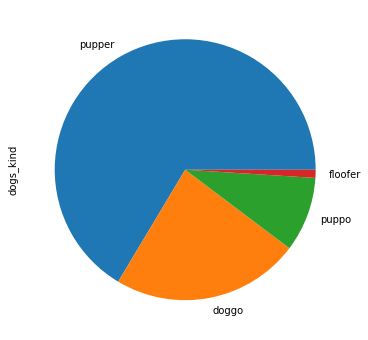

In [457]:
All_table['dogs_kind'].value_counts().plot(kind='pie', figsize=(8,6));

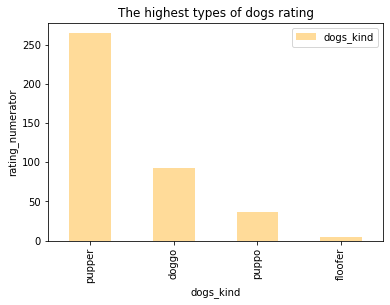

In [458]:
All_table['dogs_kind'].value_counts().plot(kind='bar', color='orange', alpha=0.4)
plt.title("The highest types of dogs rating")
plt.xlabel("dogs_kind")
plt.ylabel("rating_numerator")
plt.legend();

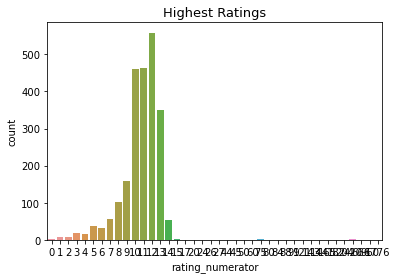

In [443]:
plt.title('Highest Ratings', size=13)
sns.countplot(data = All_table, x='rating_numerator');

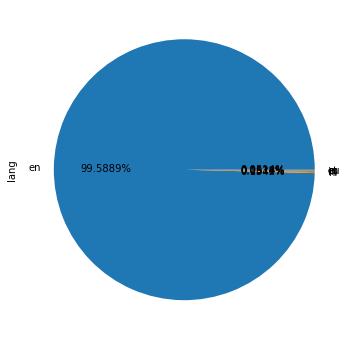

In [362]:
All_table['lang'].value_counts().plot(kind='pie', autopct='%.4f%%', figsize=(8,6));

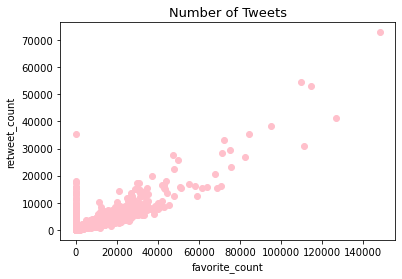

In [442]:
plt.scatter(All_table['favorite_count'], All_table['retweet_count'], color= 'pink')
plt.title('Number of Tweets', size=13)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.show()

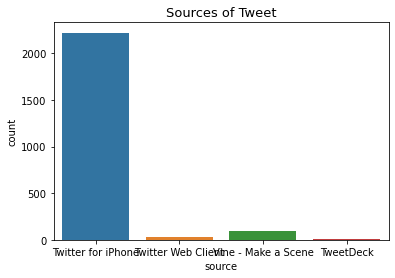

In [441]:
plt.title('Sources of Tweet', size=13)
sns.countplot(data=archive_clean, x='source');